In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import categorical_solution_1

We'll continue to make use of the fuel economy dataset in this workspace.

In [20]:
fuel_econ = pd.read_csv('../data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


###  **TO DO**
Use a plot to explore whether or not there are differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) 


**Note**: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

In [18]:
ct_counts = fuel_econ.groupby(['VClass', 'fuelType'], observed=False).size()
ct_counts

VClass            fuelType         
Compact Cars      Diesel                36
                  Natural Gas            3
                  Premium Gasoline     593
                  Regular Gasoline     490
Large Cars        Diesel                 5
                  Midgrade Gasoline     16
                  Premium Gasoline     348
                  Regular Gasoline     256
Midsize Cars      Diesel                32
                  Midgrade Gasoline      7
                  Premium Gasoline     509
                  Regular Gasoline     640
Minicompact Cars  Premium Gasoline     318
                  Regular Gasoline       3
Subcompact Cars   Diesel                 7
                  Premium Gasoline     534
                  Regular Gasoline     132
dtype: int64

In [22]:
# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression

# Create new column with True for the main_fuelType and False otherwise
main_fuelType = ['Regular Gasoline', 'Premium Gasoline']
fuel_econ['main_fuelType'] = fuel_econ['fuelType'].apply(lambda x:x in main_fuelType)
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,main_fuelType
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,True
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,True
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,True
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,True
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,True


In [23]:
# YOUR CODE HERE
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'main_fuelType'], observed=False).size()
ct_counts

VClass            main_fuelType
Compact Cars      False              39
                  True             1083
Large Cars        False              21
                  True              604
Midsize Cars      False              39
                  True             1149
Minicompact Cars  True              321
Subcompact Cars   False               7
                  True              666
dtype: int64

In [28]:
# Drop rows that are not amongs the main fuelType: Premium/Regular
fuel_econ = fuel_econ[fuel_econ['main_fuelType'] != False]
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,main_fuelType
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,True
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,True
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,True
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,True
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,True


In [29]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'fuelType'], observed=False).size()
ct_counts

VClass            fuelType        
Compact Cars      Premium Gasoline    593
                  Regular Gasoline    490
Large Cars        Premium Gasoline    348
                  Regular Gasoline    256
Midsize Cars      Premium Gasoline    509
                  Regular Gasoline    640
Minicompact Cars  Premium Gasoline    318
                  Regular Gasoline      3
Subcompact Cars   Premium Gasoline    534
                  Regular Gasoline    132
dtype: int64

<Axes: xlabel='VClass', ylabel='count'>

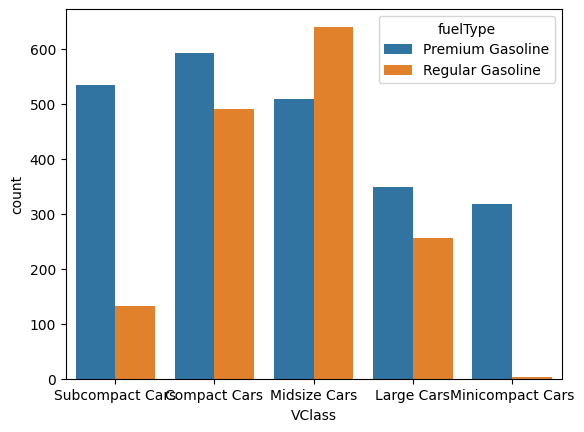

In [30]:
# Plot the bar chart
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'fuelType')

### Expected Output

I chose a clustered bar chart instead of a heat map in this case since there weren't a lot of numbers to plot. If you chose a heat map, did you remember to add a color bar and include annotations? From this plot, you can see that more cars use premium gas over regular gas, and that the smaller cars are biased towards the premium gas grade. It is only in midsize sedans where regular gasoline was used in more cars than premium gasoline.


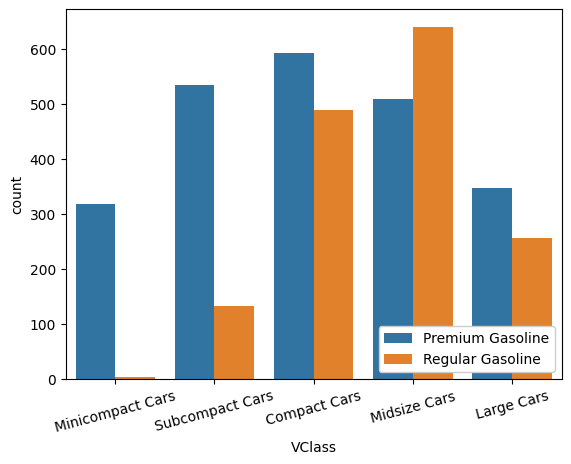

In [31]:
# run this cell to check your work against ours
categorical_solution_1()